# Creation of the subbasins of Bow River at Calgary
## The rivers and subbasins include the network topolgy infromation such as which segmenets drains into which river segmenets

In [10]:
# loading EASYMORE
from candex.candex import candex
# initializing EASYMORE object
cndx = candex()
cndx.case_name                = 'Bow_at_Calgary'
cndx.temp_dir                 = '../temporary/'
cndx.output_dir               = '../output/'

EASYMORE detect the tif file is projected in WGS84
direction map is not provided; EASYMORE will calculate flow direction and save in temporary file:
EASYMORE will save the direction file here:  ../temporary/case_temp_dir.tif
EASYMORE will save the accumulation file here:  ../temporary/case_temp_acc.tif


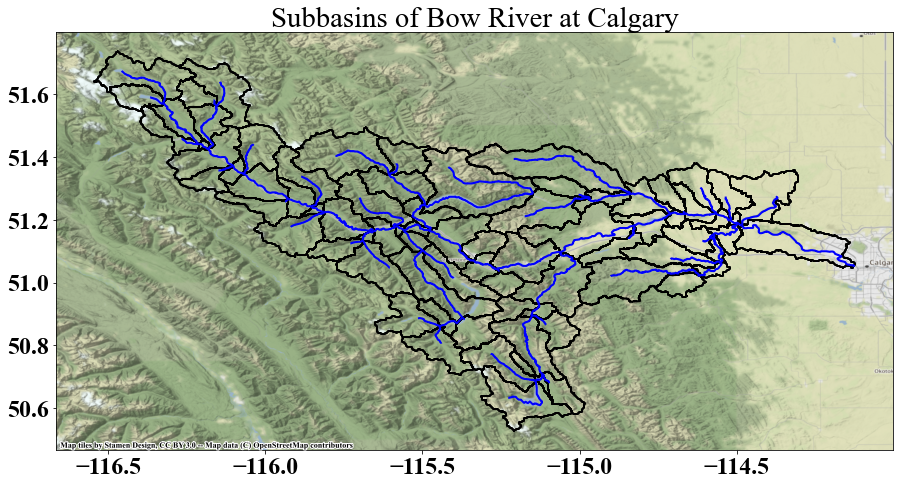

In [11]:
cndx.run_subbasin_creation(  '../data/MERIT_HYDRO/MERIT_dem.tif',
                              pour_point = (-114.127,51.054), # city of clagary
                              river_thr = 10000) #starting point of river in number of cells
# visualzing the results:
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
import contextily as ctx
font = {'family' : 'Times New Roman',
         'weight' : 'bold',
         'size'   : 24}
matplotlib.rc('font', **font)
cat = gpd.read_file(cndx.output_dir+cndx.case_name+'_subbasin.shp')
riv = gpd.read_file(cndx.output_dir+cndx.case_name+'_river_NTOPO.shp')
# plotting
f, axes = plt.subplots(1,1,figsize=(15,15))
cat.geometry.boundary.plot(color=None,edgecolor='k',linewidth = 2, ax = axes)
riv.geometry.plot(color='blue',linewidth = 2, ax = axes)
ctx.add_basemap(axes, zoom=10, crs='EPSG:4326')
plt.title ('Subbasins of Bow River at Calgary')
# plt.savefig('../fig/Example10_A.png')
plt.show()

# Zonal statistics for raster with discrete values such as land cover codes in subbasin of South Saskatchewan River; histogram is set to True to have the mode of land cover type

<AxesSubplot:>

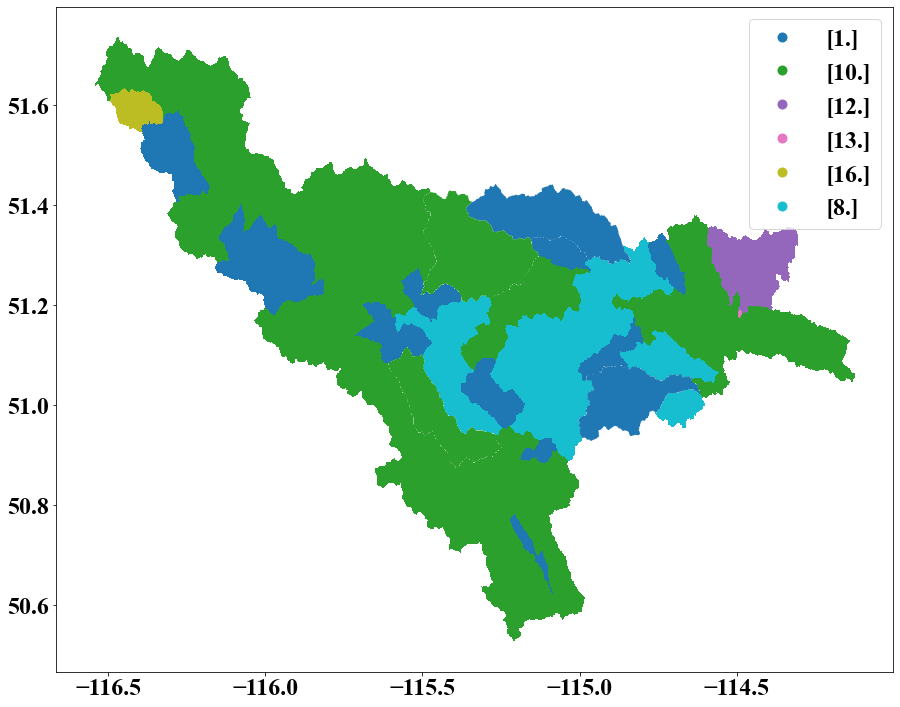

In [12]:
shp = cndx.zonal_stat(cndx.output_dir+cndx.case_name+'_subbasin.shp',
                      '../data/land_cover/land_use.tif',
                      histogram = True)
shp.to_file(cndx.output_dir+cndx.case_name+'_subbasin_land_cover.shp')
# visualize
# plotting
f, axes = plt.subplots(1,1,figsize=(15,15))
shp.plot(column = 'mode', ax = axes, legend = True)

------------
------------
# Zonal statistic of two vectors; subbasins of South Saskatchewan River and shapefiles constructed based on raster of land cover

Text(0.5, 1.0, 'Percent of cominant land cover in each subbasins')

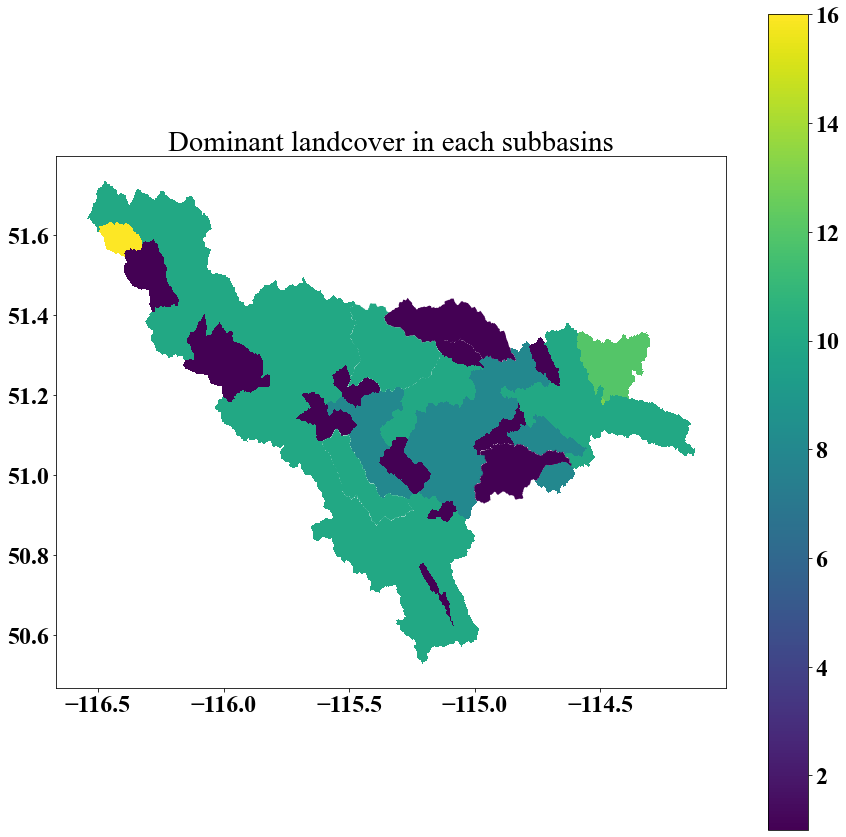

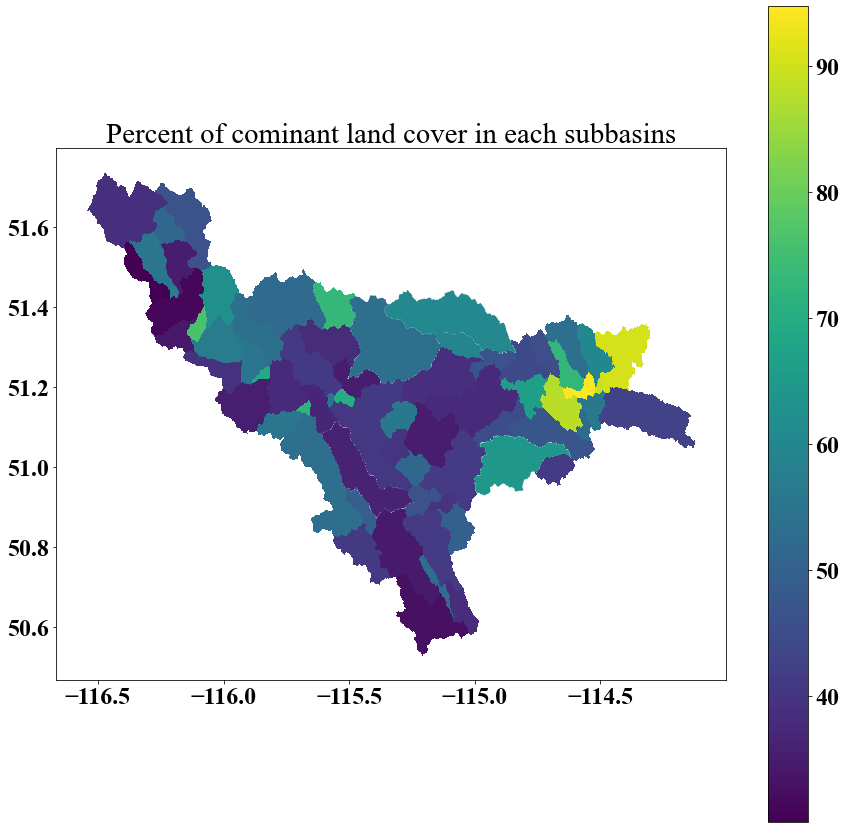

In [13]:
# convert land cover from geotiff to shapefile
cndx.geotif2shp( '../data/land_cover/land_use.tif',
                 '../temporary/land_use.shp',
                 name_of_filed = 'land_cover')

# calling the zonal_stat_vector for finding the values of second shapefile in the first shapefile
shp_int = cndx.zonal_stat_vector(cndx.output_dir+cndx.case_name+'_subbasin.shp',
                                 '../temporary/land_use.shp',
                                 field_ID_1 = 'ID',
                                 field_ID_2 = 'land_cover')


# get the maximume percent for a given subbasin
idx = shp_int.groupby(['ID_1'])['percent'].transform(max) == shp_int['percent']
shp_max = shp_int[idx]
shp_max = shp_max.sort_values(by='ID_1')
shp_max = shp_max.reset_index(drop=True)
shp_target = gpd.read_file(cndx.output_dir+cndx.case_name+'_subbasin.shp')
shp_target = shp_target.sort_values(by='ID')
shp_target = shp_target.reset_index(drop=True)
shp_target['land_cover'] = shp_max ['land_cover_2']
shp_target['percent'] = shp_max ['percent']
#
f, axes = plt.subplots(1,1,figsize=(15,15))
shp_target.plot(column  = 'land_cover', legend=True, ax = axes)
plt.title ('Dominant landcover in each subbasins')
#
f, axes = plt.subplots(1,1,figsize=(15,15))
shp_target.plot(column  = 'percent', legend=True, ax = axes)
plt.title ('Percent of cominant land cover in each subbasins')



---------
---------
# Zonal statistics for raster with continouse values such as dem (digital elevation model); histogram is set to Flase (as default)

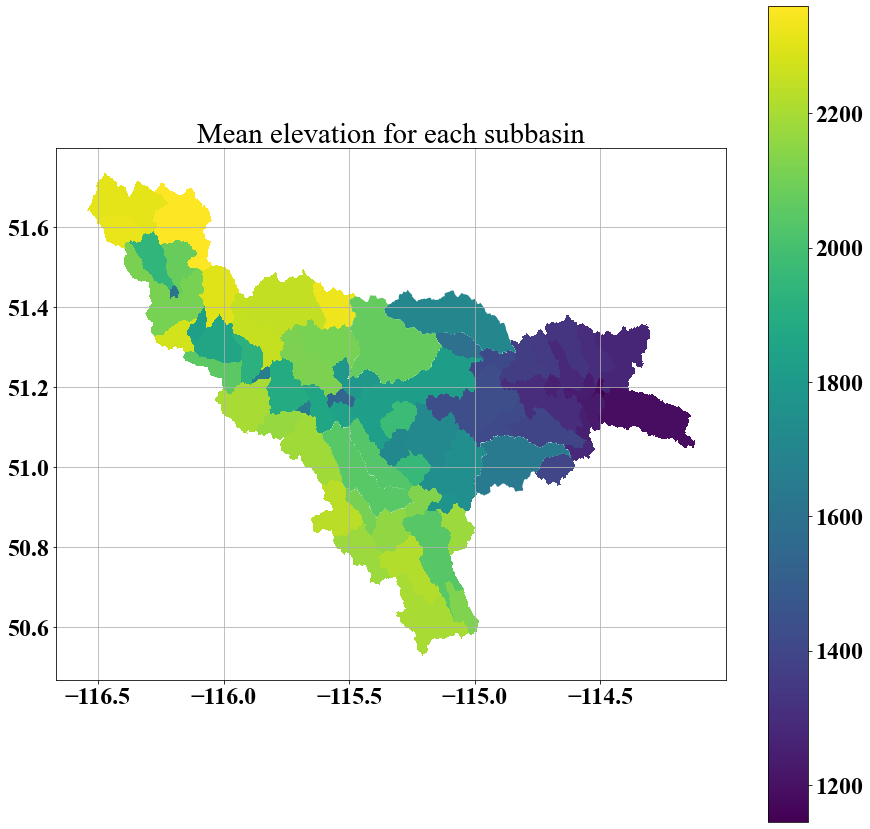

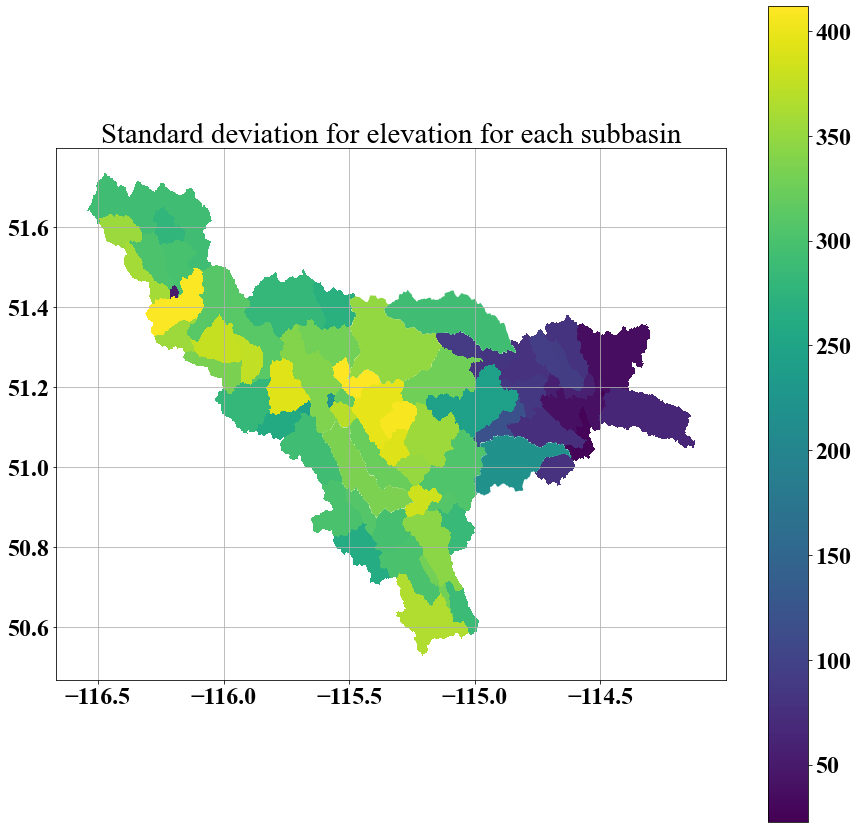

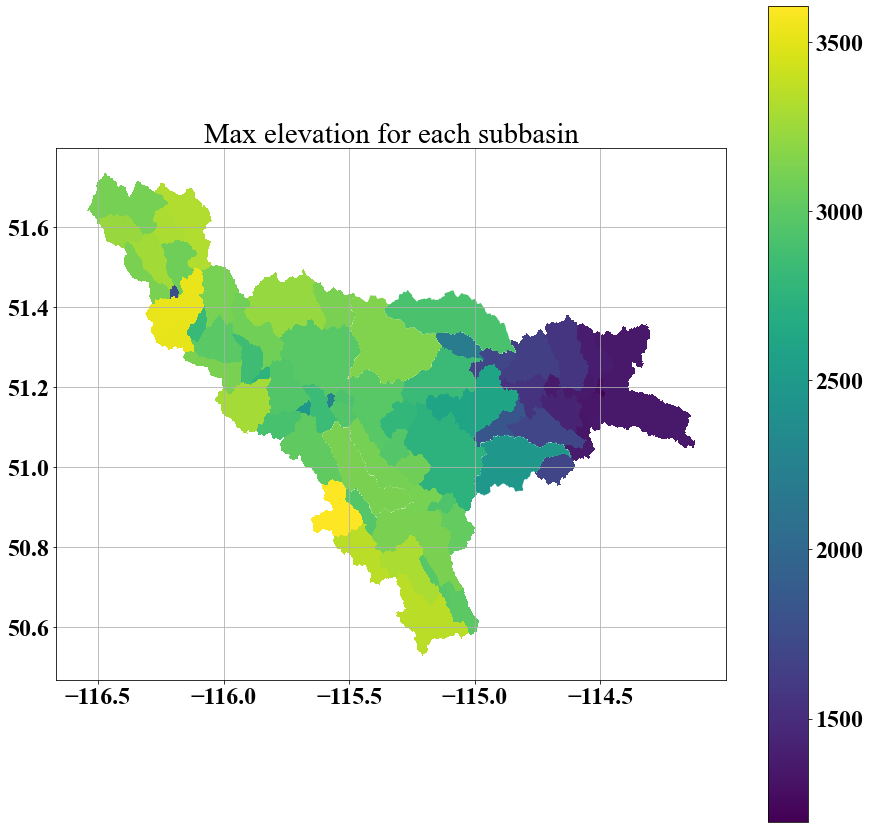

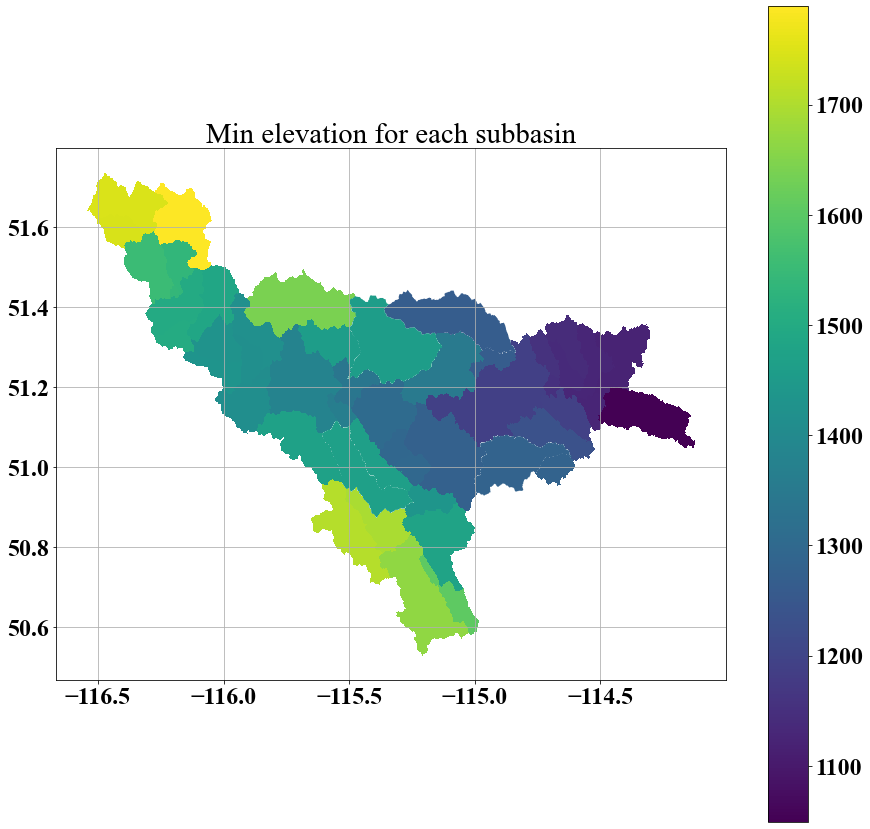

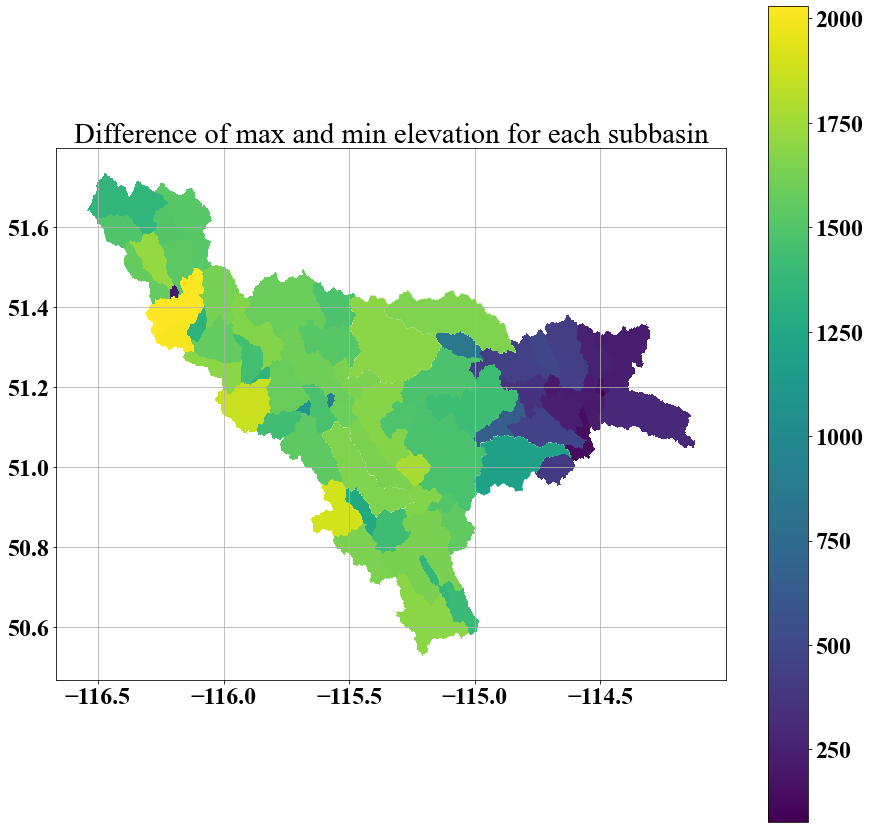

In [14]:
cat_elevetaion = cndx.zonal_stat(cndx.output_dir+cndx.case_name+'_subbasin.shp',
                                 '../data/MERIT_HYDRO/MERIT_dem.tif')
cat_elevetaion ['max_min'] = cat_elevetaion['max'] - cat_elevetaion ['min']
cat_elevetaion.to_file(cndx.temp_dir+cndx.case_name+'_subbasin_ele.shp')
#
f, axes = plt.subplots(1,1,figsize=(15,15))
cat_elevetaion.plot(column  = 'mean', legend=True, ax = axes)
plt.title ('Mean elevation for each subbasin')
plt.grid()
#
f, axes = plt.subplots(1,1,figsize=(15,15))
cat_elevetaion.plot(column  = 'std', legend=True, ax = axes)
plt.title ('Standard deviation for elevation for each subbasin')
plt.grid()
#
f, axes = plt.subplots(1,1,figsize=(15,15))
cat_elevetaion.plot(column  = 'max', legend=True, ax = axes)
plt.title ('Max elevation for each subbasin')
plt.grid()
#
f, axes = plt.subplots(1,1,figsize=(15,15))
cat_elevetaion.plot(column  = 'min', legend=True, ax = axes)
plt.title ('Min elevation for each subbasin')
plt.grid()
#
f, axes = plt.subplots(1,1,figsize=(15,15))
cat_elevetaion.plot(column  = 'max_min', legend=True, ax = axes)
plt.title ('Difference of max and min elevation for each subbasin')
plt.grid()


# Voronoi diagram for the centroid of subbasins

<ipython-input-15-a733ec02cc3e>:15: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df['lat'] = shp.centroid.y
<ipython-input-15-a733ec02cc3e>:16: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df['lon'] = shp.centroid.x
/Users/shg096/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/candex/candex.py:1864: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  stations_buffert = stations.buffer(buffer) # add a buffer


no crs is provided for the point shapefiles; EASYMORE will allocate WGS84
epsg:4326


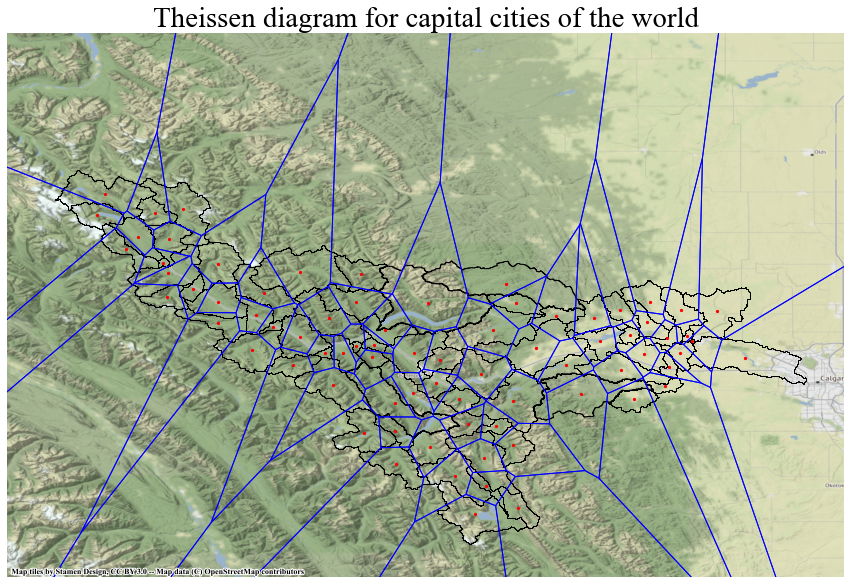

In [15]:
# loading EASYMORE
import contextily as ctx
import matplotlib.pyplot as plt
import matplotlib
import geopandas as gpd
import pandas as pd
font = {'family' : 'Times New Roman',
         'weight' : 'bold',
         'size'   : 24}
matplotlib.rc('font', **font)

#
shp = gpd.read_file(cndx.output_dir+cndx.case_name+'_subbasin.shp')
df = pd.DataFrame()
df['lat'] = shp.centroid.y
df['lon'] = shp.centroid.x
shp_points = cndx.make_shape_point(df,
                                   'lon',
                                   'lat')
shp_points.to_file(cndx.temp_dir+cndx.case_name+'_subbasin_centroid.shp')
cndx.voronoi_diagram(cndx.temp_dir+cndx.case_name+'_subbasin_centroid.shp',
                     cndx.output_dir+cndx.case_name+'_subbasin_centroid_voronoi.shp')

# visualize
cat = gpd.read_file(cndx.output_dir+cndx.case_name+'_subbasin.shp')
voronoi = gpd.read_file(cndx.output_dir+cndx.case_name+'_subbasin_centroid_voronoi.shp')
centroid = gpd.read_file(cndx.temp_dir+cndx.case_name+'_subbasin_centroid.shp')
fig, ax = plt.subplots(figsize=(15, 10))
cat.plot(ax=ax, facecolor="none", edgecolor='black')
voronoi.plot(ax=ax, facecolor="none", edgecolor='blue')
centroid.plot(ax=ax, color='red', markersize = 5)
ax.axis('off')
plt.axis('equal')
ctx.add_basemap(ax, zoom=10, crs='EPSG:4326')
plt.title ('Theissen diagram for capital cities of the world')
plt.xlim(-116.7,-114)
plt.ylim(50.8,51.8)
# plt.savefig('../fig/Example3_A.png')
plt.show()



<ipython-input-16-14ad021c26ac>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cat_elevation['lat'] = cat_elevation.centroid.y
<ipython-input-16-14ad021c26ac>:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cat_elevation['lon'] = cat_elevation.centroid.x


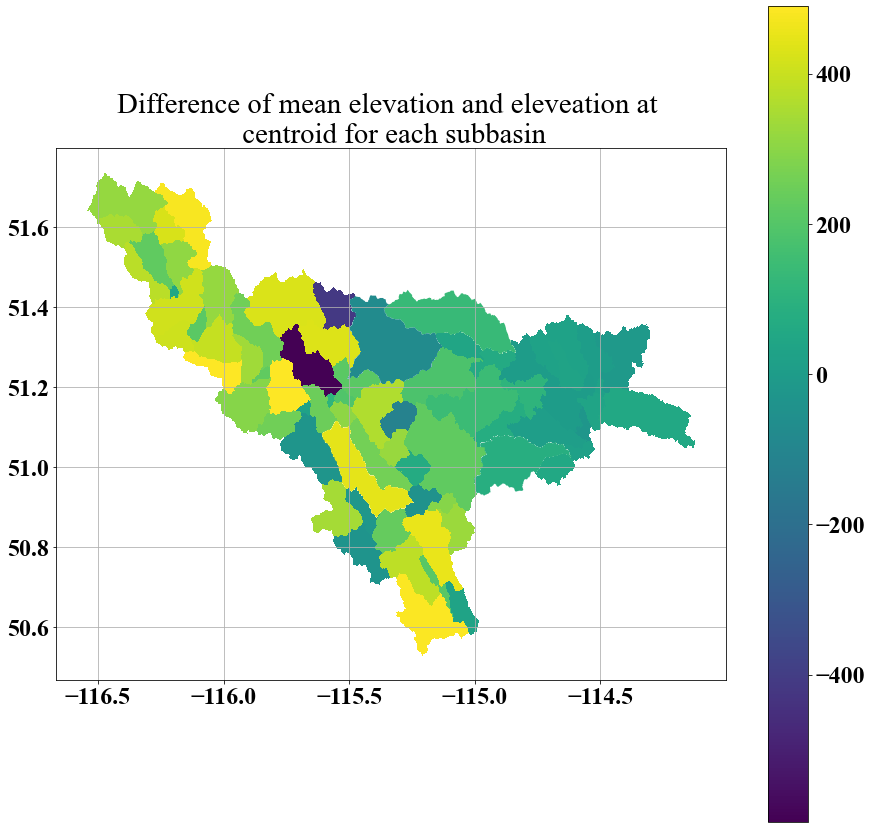

In [16]:
cat_elevation = gpd.read_file(cndx.temp_dir+cndx.case_name+'_subbasin_ele.shp')
cat_elevation['lat'] = cat_elevation.centroid.y
cat_elevation['lon'] = cat_elevation.centroid.x
cat_elevation['center'] = cndx.extract_value_tiff (cat_elevation['lon'],
                                                   cat_elevation['lat'],
                                                   '../data/MERIT_HYDRO/MERIT_dem.tif')
cat_elevation['diff_m_c'] = cat_elevation['mean'] - cat_elevation['center']
#
f, axes = plt.subplots(1,1,figsize=(15,15))
cat_elevation.plot(column  = 'diff_m_c', legend=True, ax = axes)
plt.title ('Difference of mean elevation and eleveation at \n centroid for each subbasin')
plt.grid()


# create the elevation zones and convert it to vector (shapefile)

[   0.          500.         1000.         1500.         2000.
 2500.         3000.         3604.40014648]


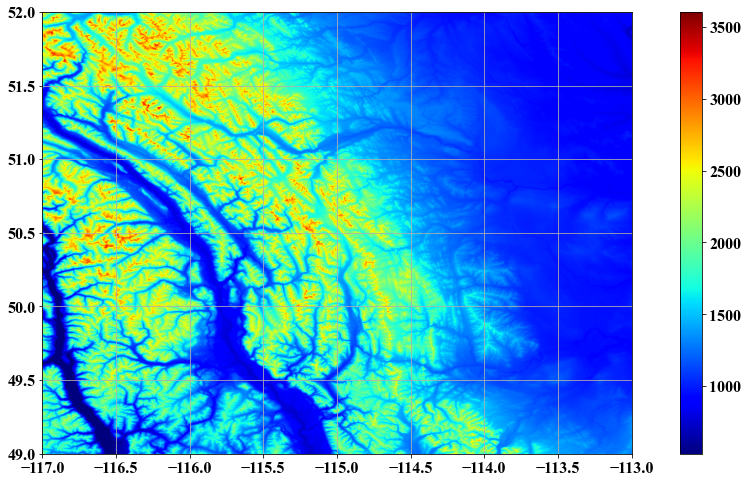

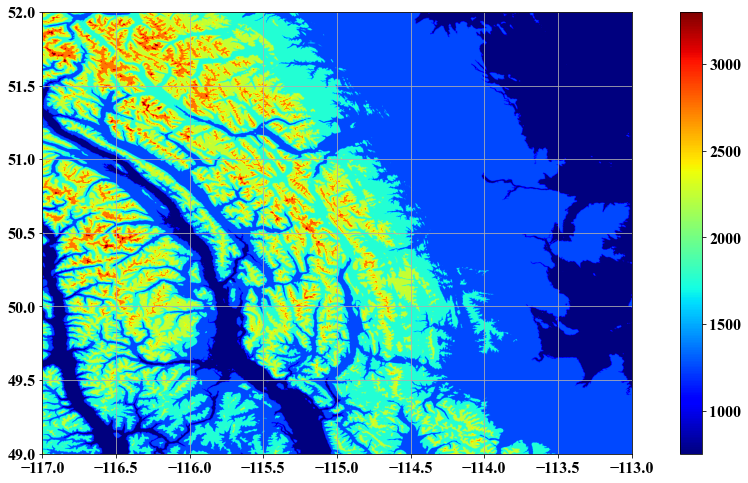

In [8]:
import numpy as np
slice_values = np.array([0,500,1000,1500,2000,2500,3000])
cndx.geotif_zones('../data/MERIT_HYDRO/MERIT_dem.tif',
                  cndx.temp_dir+cndx.case_name+'_MERIT_dem_zoned.tif',
                  slice_values = slice_values)
cndx.geotif2shp(cndx.temp_dir+cndx.case_name+'_MERIT_dem_zoned.tif',
                cndx.temp_dir+cndx.case_name+'_MERIT_dem_zoned.shp',
                name_of_filed = 'ele[m]',
                dissolve = True)
# visualize the tiff files
cndx.visualize_tiff ('../data/MERIT_HYDRO/MERIT_dem.tif')
cndx.visualize_tiff (cndx.temp_dir+cndx.case_name+'_MERIT_dem_zoned.tif')

# get the mean elevation for the subbasina and elevation zones

/Users/shg096/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/candex/candex.py:1174: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp_1['AS1']  = shp_1.area
/Users/shg096/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/candex/candex.py:1186: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp_2['AS2'] = shp_2.area
/Users/shg096/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/candex/candex.py:1191: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  result['AINT'] = result['geometry'].area
<ipython-input-9-86c26261727a>:6: UserWarning: Column names longer than 10 characters w

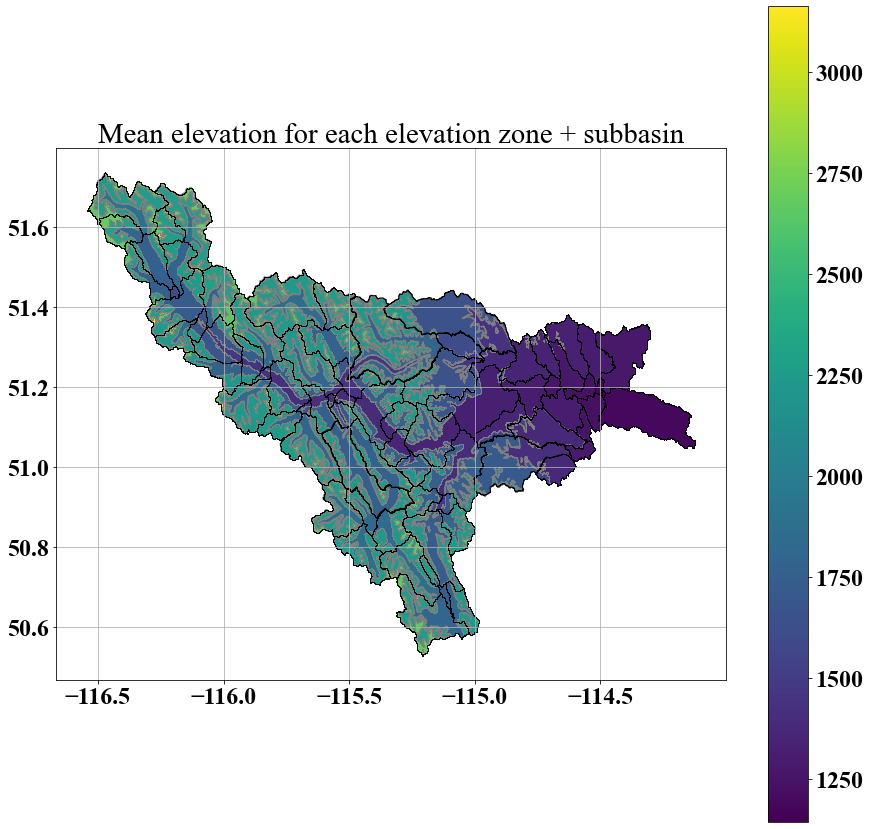

In [9]:
import geopandas as gpd
cat = gpd.read_file(cndx.output_dir+cndx.case_name+'_subbasin.shp')
elevation_zones = gpd.read_file(cndx.temp_dir+cndx.case_name+'_MERIT_dem_zoned.shp')

shp = cndx.intersection_shp (cat, elevation_zones)
shp.to_file(cndx.temp_dir+cndx.case_name+'_cat_MERIT_dem_zoned.shp')
cat_elevetaion = cndx.zonal_stat(cndx.temp_dir+cndx.case_name+'_cat_MERIT_dem_zoned.shp',
                                 '../data/MERIT_HYDRO/MERIT_dem.tif')
cat_elevetaion.to_file(cndx.temp_dir+cndx.case_name+'_cat_MERIT_dem_zoned_into.shp')
#
import matplotlib.pyplot as plt
import matplotlib
import geopandas as gpd
import pandas as pd
font = {'family' : 'Times New Roman',
         'weight' : 'bold',
         'size'   : 24}
matplotlib.rc('font', **font)
f, axes = plt.subplots(1,1,figsize=(15,15))
cat_elevetaion.plot(column  = 'mean', legend=True, ax = axes)
cat_elevetaion.plot(facecolor="none", ax = axes, edgecolor='grey')
cat.plot(facecolor="none", ax = axes, edgecolor='black')
plt.title ('Mean elevation for each elevation zone + subbasin')
plt.grid()
